## Data Science Programmentwurf am Beispieldatensatz mit Fahrzeugen

#### Kurs: Data Science (Wahlfach)
#### Abgabetermin: 18.04.2019
#### Gruppe: David Marchi & Yunus Emre Besogul

In [73]:
# All imports here...

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Reading the data

In [79]:
# 1. mpg (miles per gallon):           continuous
# 2. cylinders:     multi-valued discrete
# 3. displacement:  continuous
# 4. horsepower (hp):    continuous
# 5. weight:        continuous
# 6. acceleration:  continuous
# 7. model year (year):    multi-valued discrete
# 8. origin:        multi-valued discrete
# 9. car name (name):      string (unique for each instance)

# Set option to print pretty...
pd.set_option('display.max_columns', None)

# Read csv into as a variable "df" (with space and tab delimeter, remove header and rename columns as explained in "auto-mpg.names")
col_Names = ["mpg", "cylinders", "displacement", "hp", "weight", "acceleration", "year", "origin", "name"]
df = pd.read_csv("auto-mpg.data-original", sep='\t+|\s\s+', engine='python', header=None, names=col_Names)



#### Teil 1: Dieser Fahrzeugdatensatz ist mit Hilfe statistischer Standardfunktionen zu analysieren, zu interpretieren und ggfs. zu bereinigen. Nutzen Sie visuelle, möglichst in die Programmierumgebung eingebettete Darstellungsarten in verschiedenen Diagrammen, um wichtige Zusammenhänge zu visualisieren. Nutzen Sie Kommentare, um zu beschreiben, was jeweils Interessantes zu erkennen ist.

##### First analyze and clean up

In [80]:
# Analyzing:
print("Analyze the data first:")
df.info()


# Look for false entries (empty, NaN, N/A, ?, ...)
print("\nFalse data:")
print(df.isnull().any())


# Check dimension of Dataframe
print("\nDimension:")
print(df.shape)
# ... we have 406 rows of data


# ...we see that there is false data in mpg and horsepower (hp)
# ...8 mpg data is missing, and 6 horsepower (hp) data is missing


# Remove false entries...
df = df[df['mpg'].notnull()]
df = df[df['hp'].notnull()]


# Check dimension of Dataframe again
print("\nDimension after cleaning up:")
print(df.shape)
# ...this reduces our dataset to 392. Meaning 14 datarows were corrupt



Analyze the data first:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
hp              400 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
year            406 non-null float64
origin          406 non-null float64
name            406 non-null object
dtypes: float64(8), object(1)
memory usage: 28.6+ KB

False data:
mpg              True
cylinders       False
displacement    False
hp               True
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool

Dimension:
(406, 9)

Dimension after cleaning up:
(392, 9)


##### View some basic statistical details of the Dataframe

In [76]:
print("\nBasic statistical details:")
print(df.describe())
# ...we have model years from 1970 to 1982
# ...we have 3 origins for a car (Herkunft)
# ...mpg is minimum 9 and maximum 46, but has an average of 24.44 with a variation of 7.8
# ...we will continue by seperating these 3 origin types and also comparing them

# Print correlation
df.corr()




Basic statistical details:
              mpg   cylinders  displacement          hp       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
7

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
hp,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


##### Visualizing/plotting the data:

Draw scatterplots to see relationships:


LinAlgError: singular matrix

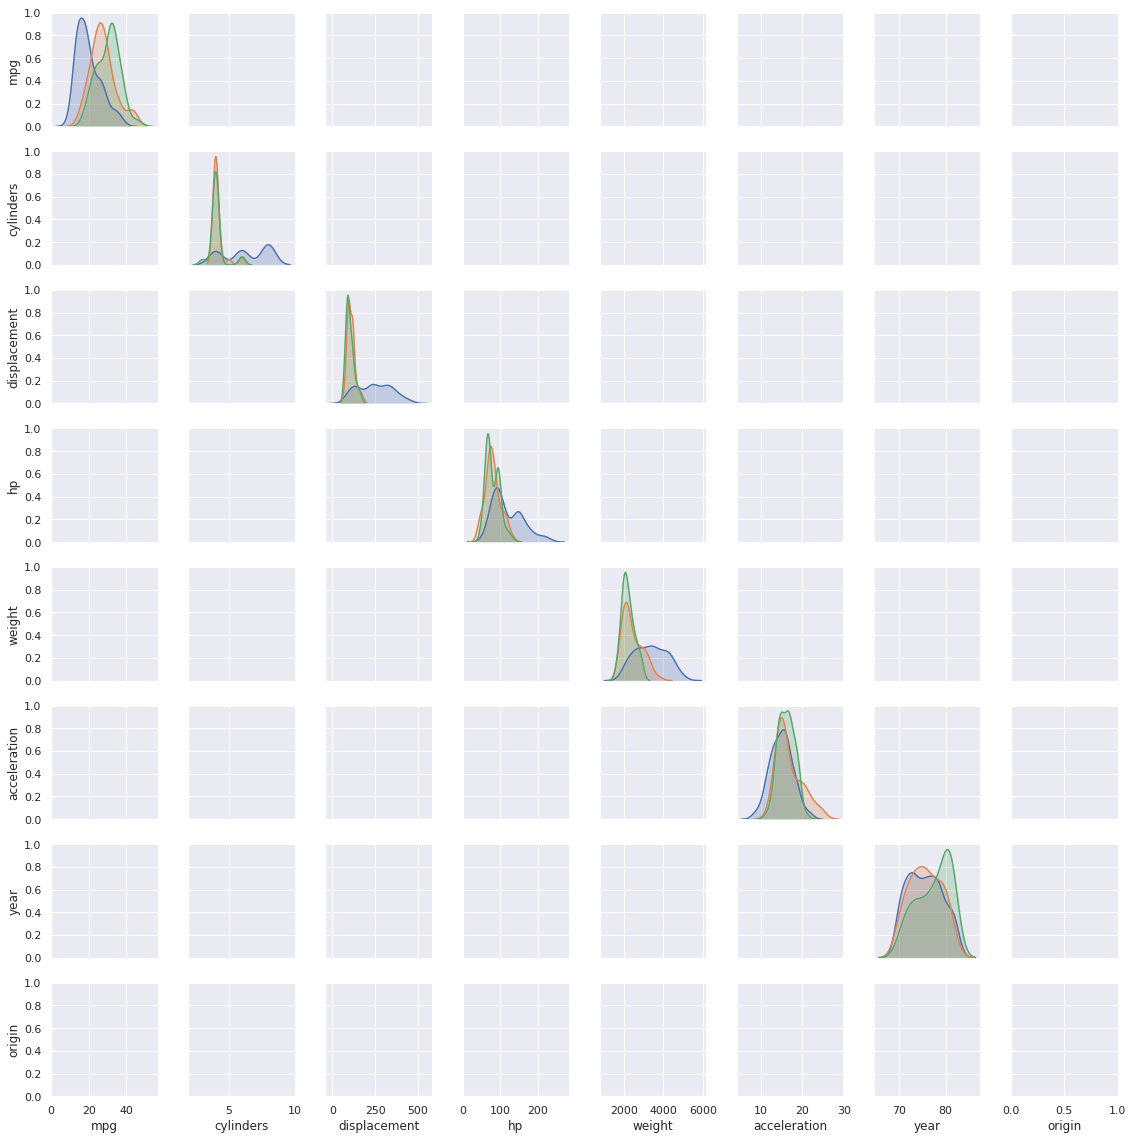

In [77]:
print("Draw scatterplots to see relationships:")

# Scatterplot/Pairplot
sns.set()
sns.pairplot(df, height=2, hue ='origin', markers=["o", "s", "D"])
plt.show()


# We see alot of plots but let's have a closer look with different visualizations:


# mpg and year relationship
sns.catplot(x="year", y="mpg", data=df, kind="box")
plt.axhline(df.mpg.mean(),color='r',linestyle='dashed',linewidth=2)
# ...mpg gets higher of the years but reaches its maximum in 1980
# ...average of mpg is 24.44


# mpg and origin relationship
sns.catplot(x="year", y="mpg", data=df, col="origin", kind="box")
# ...mpg in origin 1 is below the average
# ...mpg in origin 2 is above the average
# ...mpg in origin 3 is above the average


# mpg and acceleration relationship makes no sense here
# mpg and horse power relationship makes no sense here
# mpg and weight relationship makes no sense here
# mpg and displacement relationship makes no sense here
# mpg and model name relationship makes no sense here


# mpg and cylinders relationship
sns.catplot(x="cylinders", y="mpg", data=df, kind="box")
plt.axhline(df.mpg.mean(),color='r',linestyle='dashed',linewidth=2)
sns.catplot(x="cylinders", y="mpg", data=df, col="origin", kind="box")
# ...origin 1 has 4, 6 and 8 cylinders
# ...origin 2 has 4, 4 and 5 cylinders
# ...origin 3 has 3, 4 and 6 cylinders
# ...havin 4 or 5 cylinders means, havin mpg above average, while the rest gets mpg below average


# ...mpg is spread in many variables such as origin, year, model, cylinders, displacement, horse power, weight and model name



In [ ]:
df.head()

#### Teil 2: Verwenden Sie zwei verschiedene Vorhersageverfahren, um die PS-Zahl anhand eines gegebenen Datensatzes ohne PS-Zahl vorherzusagen.

##### Linear Regression 

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.preprocessing import StandardScaler


# Predict horse power (hp) via given values


# We will need to first split up our data into an X array that contains the features to train on
# and a y array with the target variable, in this case the horse power column
# Split data, to training and testing data to validate the model
df_x = df[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin']]
df_y = df[['hp']]
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.25, random_state=1)


# Create linear regression object and train the model
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

# Predict data
p1 = lr.predict([[18,8,307,3504.0,12,70,1]]) # => 130 horse power...
print(p1)

p2 = lr.predict([[16,8,304,3433.0,12,70,1]]) # => 150 horse power...
print(p2)

p3 = lr.predict([[16,8,302,3449.0,10.5,70,1]]) # => 140 horse power...
print(p3)

p4 = lr.predict([[31,4,119,2720.0,19.4,82,1]]) # => 82 horse power...
print(p4)

p5 = lr.predict([[44,4,97,2130.0,24.6,82,2]]) # => 52 horse power...
print(p5)


# Plot
target_pred = lr.predict(X_test)
print(accuracy_score(y_test, target_pred))


[[142.08423114]]
[[140.15556223]]
[[147.03320764]]
[[68.43949991]]
[[30.99438839]]


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

##### Decision Trees

In [69]:
from sklearn import tree


# We will need to first split up our data into an X array that contains the features to train on
# and a y array with the target variable, in this case the horse power column
# Split data, to training and testing data to validate the model
df_x = df[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin']]
df_y = df[['hp']]


# Create Decision Tree classifer object and train the model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


# Predict data
p1 = clf.predict([[18,8,307,3504.0,12,70,1]]) # => 130 horse power...
print(p1)

p2 = clf.predict([[16,8,304,3433.0,12,70,1]]) # => 150 horse power...
print(p2)

p3 = clf.predict([[16,8,302,3449.0,10.5,70,1]]) # => 140 horse power...
print(p3)

p4 = clf.predict([[31,4,119,2720.0,19.4,82,1]]) # => 82 horse power...
print(p4)

p5 = clf.predict([[44,4,97,2130.0,24.6,82,2]]) # => 52 horse power...
print(p5)


# Plot
target_pred = clf.predict(X_test)
print(accuracy_score(y_test, target_pred))



[3.]
[3.]
[3.]
[4.]
[4.]
0.9693877551020408


#### Teil 3: Nutzen Sie zwei Klassifikationsverfahren, um ein Fahrzeug bei sonstigen gegebenen Daten einer Zylinderzahl zuzuordnen

In [62]:
from sklearn import preprocessing

# Data Preperation
col_Names = ["mpg", "cylinders", "displacement", "hp", "weight", "acceleration", "year", "origin", "name"]
df = pd.read_csv("auto-mpg.data-original", sep='\t+|\s\s+', engine='python', header=None, names=col_Names)

# Remove false entries...
df = df[df['mpg'].notnull()]
df = df[df['hp'].notnull()]

df = df.drop(columns=['name'])

X_val = df.drop(columns=['cylinders'])
y_val = df['cylinders']



X_train, X_test, y_train, y_test = train_test_split(X_val, 
                                                    y_val,
                                                    test_size=0.25, random_state=1)

mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)

mm_scaler.transform(X_test)
print(df.head())
X_train.head()

    mpg  cylinders  displacement     hp  weight  acceleration  year  origin
0  18.0        8.0         307.0  130.0  3504.0          12.0  70.0     1.0
1  15.0        8.0         350.0  165.0  3693.0          11.5  70.0     1.0
2  18.0        8.0         318.0  150.0  3436.0          11.0  70.0     1.0
3  16.0        8.0         304.0  150.0  3433.0          12.0  70.0     1.0
4  17.0        8.0         302.0  140.0  3449.0          10.5  70.0     1.0


,mpg,displacement,hp,weight,acceleration,year,origin
266,20.8,200.0,85.0,3070.0,16.7,78.0,1.0
296,16.9,350.0,155.0,4360.0,14.9,79.0,1.0
115,20.0,97.0,88.0,2279.0,19.0,73.0,3.0
213,26.5,140.0,72.0,2565.0,13.6,76.0,1.0
106,18.0,232.0,100.0,2945.0,16.0,73.0,1.0


##### KNN 

In [63]:
df.head()
# X_train, X_test, y_train, y_test
#y_train.head()


,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train.values.ravel())

target_pred = model.predict(X_test)
accuracy_score(y_test, target_pred)


0.9285714285714286

##### Naive Bayes

In [67]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = MultinomialNB() #BernoulliNB() #MultinomialNB() #GaussianNB()
predicted = model.fit(X_train, y_train.values.ravel())

target_pred = model.predict(X_test)
accuracy_score(y_test, target_pred)

0.9693877551020408

#### Für Teile 2 und 3: Validieren und testen Sie Ihre Ergebnisse jeweils mit Evaluationsmethoden wie diese bei Data Science Projekten üblich sind. Stellen Sie jeweils die Ergebnisse Ihrer Verfahren vergleichend optisch dar und beschreiben Sie das jeweilige Endergebnis. Diskutieren Sie, für welche Lösung Sie sich entscheiden. Optimieren Sie in einer bis maximal drei Iteration(en) die gewählte Lösung. Kommentieren Sie ggfs., welche weiteren Möglichkeiten zur Verbesserung Sie noch anwenden könnten. Erstellen Sie eine Methode, mit der man die Daten, für die eine Vorhersage getroffen werden soll, manuell eingeben kann, und diese einem das Resultat liefert und auch optisch sinnvoll anzeigt.

In [58]:
# Accuracy, mean error, etc.